# Acquire data from accelerometer from DAQ Board
## Callin Switzer
## python 3 (pyfly35 environment)
## 22 Jan 2017


Download nidaq driver for ni USB-6229 (save to thumb drive)

Download/update anaconda

download PyDAQmx

download pySerial (conda install pySerial)

upload code to Arduinos (001_Stepper_and_DCMotor)

# Setup

- import packages
- connect to arduino boards
- print system information and timestamp

In [1]:
from DataAcqUtils import *

3.5.4 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:15:17) [MSC v.1900 64 bit (AMD64)]
last run on 2018-07-25 12:53:41.381767
directory where data will be deposited: C:\Users\Combes4\Desktop\temp3\
_____________________________________________
connected to arduino on COM3
connected to arduino on COM5


# Test motors

In [2]:
# stepper only
written = ser1.write("s".encode("utf-8"))
written = ser2.write("s".encode("utf-8"))

In [3]:
# vibration motor only
written = ser1.write("v".encode("utf-8"))
written = ser2.write("v".encode("utf-8"))

Run the following cell until pollen comes out on every iteration

In [525]:
# both motors
written = ser1.write("sv".encode("utf-8"))
written = ser2.write("sv".encode("utf-8"))

# Test accelerometers

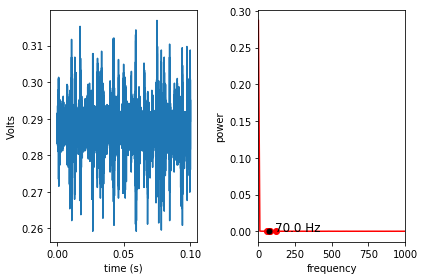

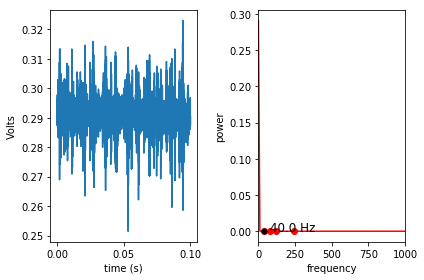

[None, None]

In [5]:
# test accelerometers
acc1 = accelDta("Dev2/ai0")
acc2 = accelDta("Dev2/ai1")
[j.readAccel() for j in [acc1, acc2]]
[k.FFT() for k in [acc1, acc2]]
[kk.plotFFT() for kk in [acc1, acc2]]

# Experimental Start

In [22]:
# determine the treatments
reward1, reward2 = randomAssignTreatment()


reward_1:False, reward_2:True


#### Change values in the next cell
---

C:\Users\Combes4\Desktop\temp3\2018_07_25__14_10_18_676\2018_07_25__14_10_18_676.csv
0.116326609681 Dev2/ai1


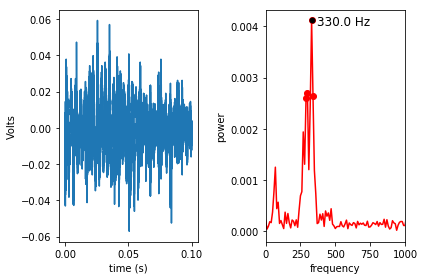

0.205110707869 Dev2/ai1


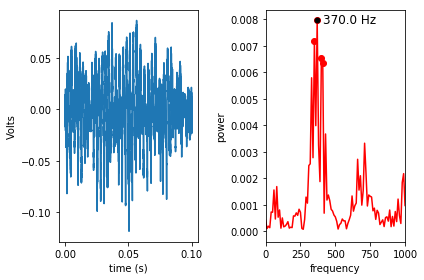

0.145489269616 Dev2/ai1


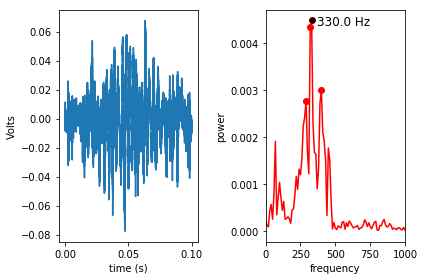

0.138360619477 Dev2/ai1


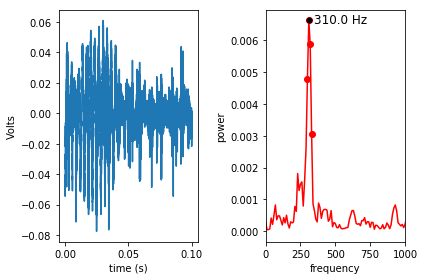

0.162338806691 Dev2/ai1


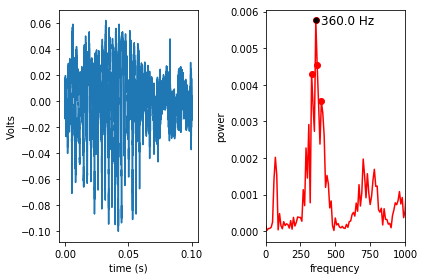

0.102069309369 Dev2/ai1


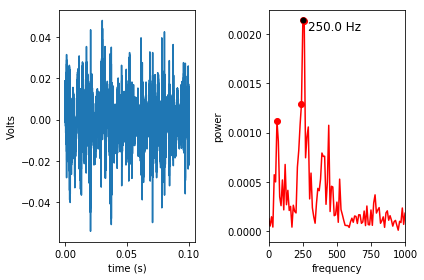

0.0994770729388 Dev2/ai1


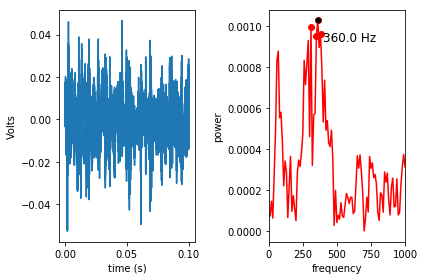

0.11308631418 Dev2/ai1


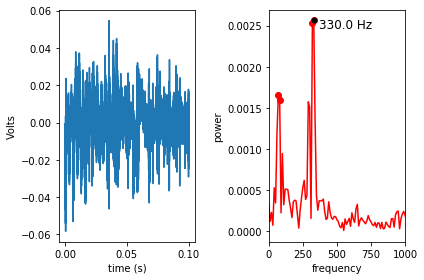

0.127343614583 Dev2/ai1


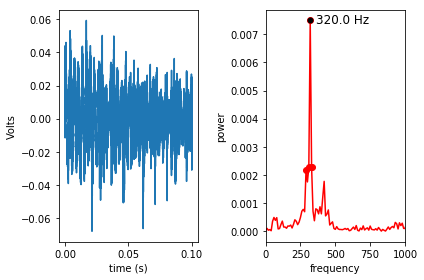

0.123779289475 Dev2/ai1


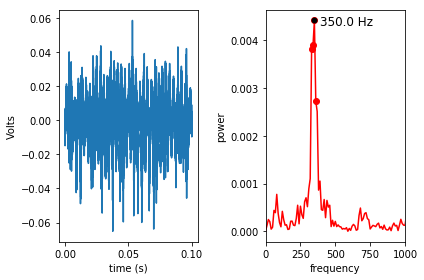

0.16071865849 Dev2/ai1


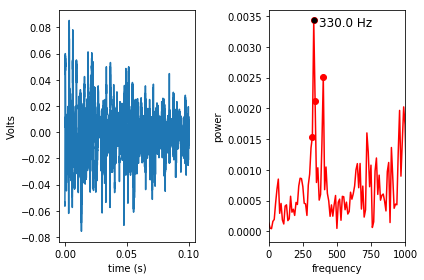

0.234597397394 Dev2/ai1


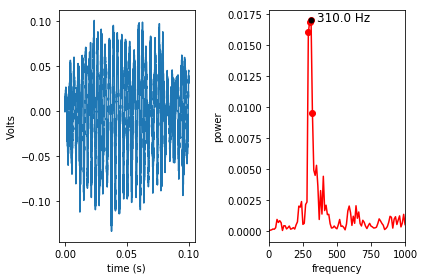

0.242698136201 Dev2/ai1


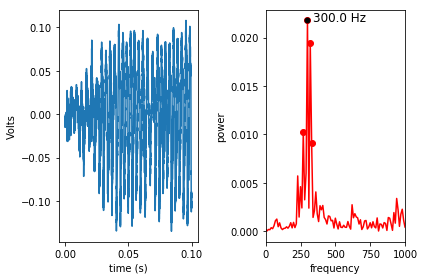

0.224876510609 Dev2/ai1


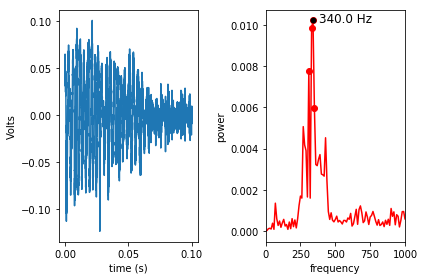

0.145165239918 Dev2/ai1


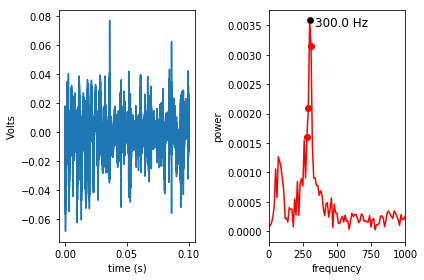

0.29648704354 Dev2/ai1


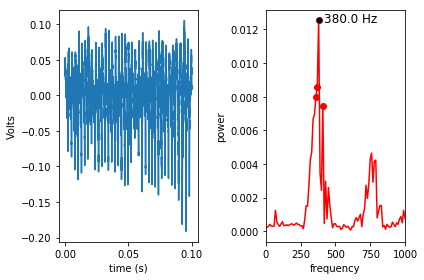

0.1902053484 Dev2/ai1


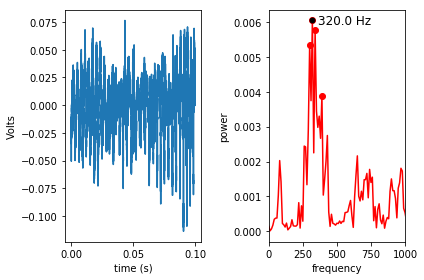

0.150025683384 Dev2/ai1


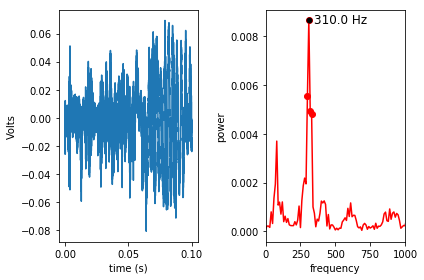

0.136092412364 Dev2/ai1


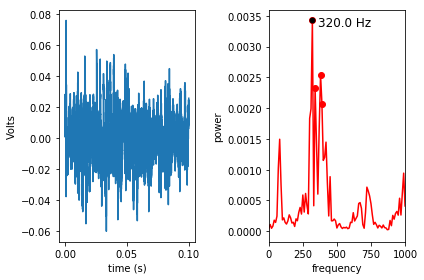

0.238161722427 Dev2/ai1


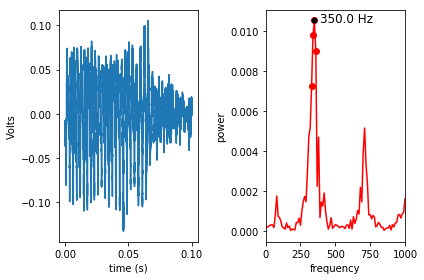

0.207378914878 Dev2/ai1


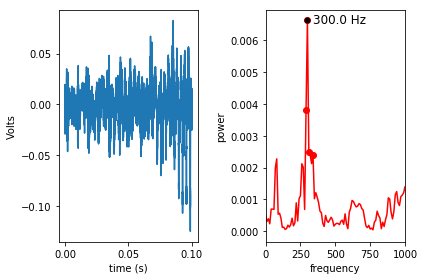

0.355460423819 Dev2/ai1


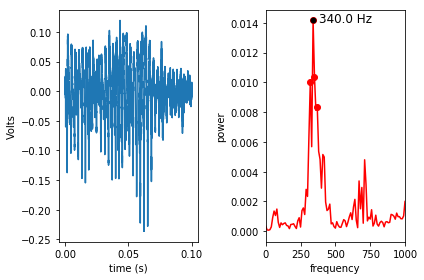

0.300051367893 Dev2/ai1


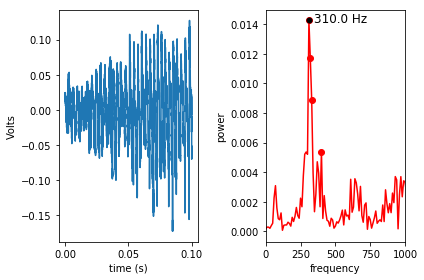

0.161042688255 Dev2/ai1


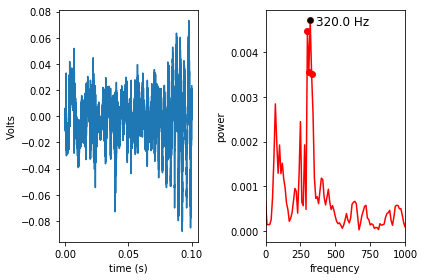

0.315928816569 Dev2/ai1


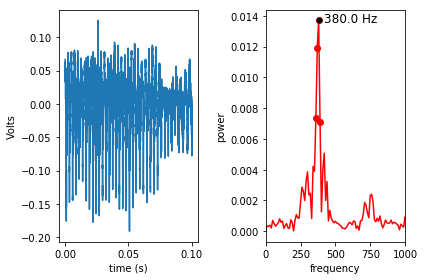

0.156830304344 Dev2/ai1


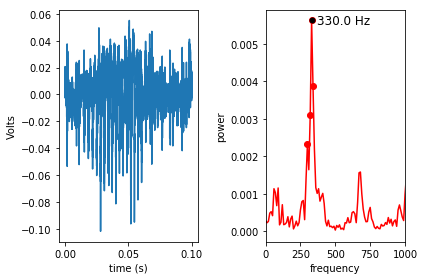

0.116974668745 Dev2/ai1


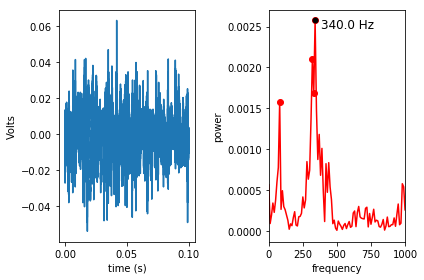

0.21547965355 Dev2/ai0


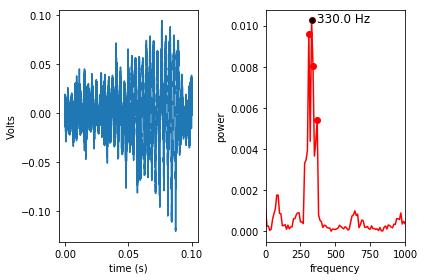

0.235893515901 Dev2/ai0


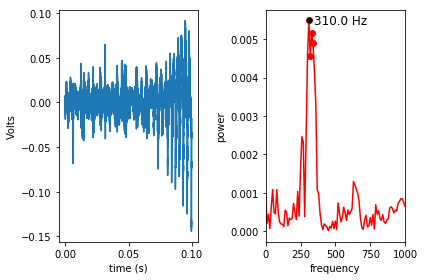

0.354488333429 Dev2/ai0


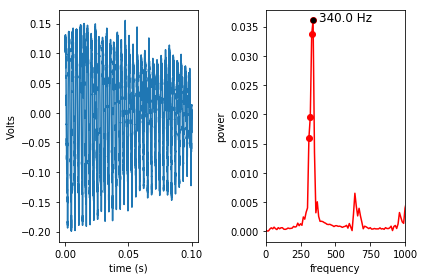

0.466602561822 Dev2/ai0


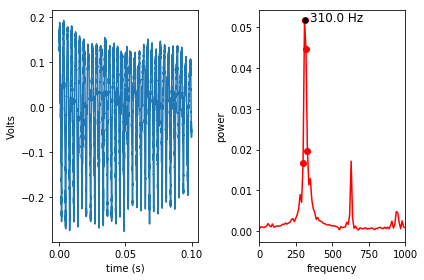

0.132852117012 Dev2/ai1


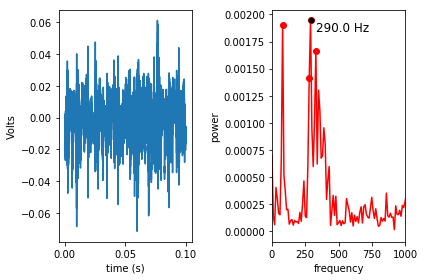

0.268620501048 Dev2/ai1


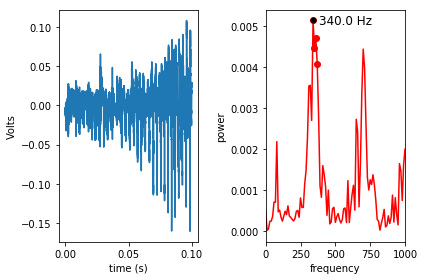

0.246586490838 Dev2/ai0


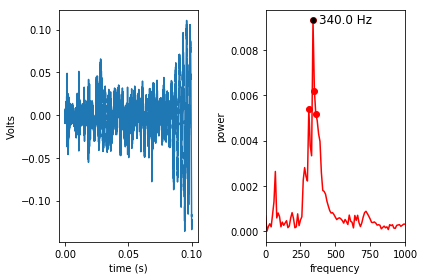

0.13155599874 Dev2/ai0


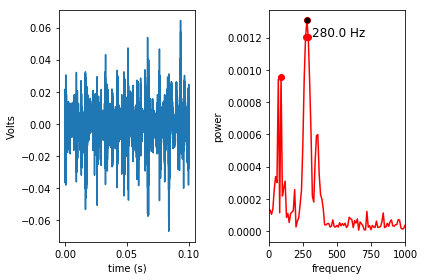

0.122159141729 Dev2/ai0


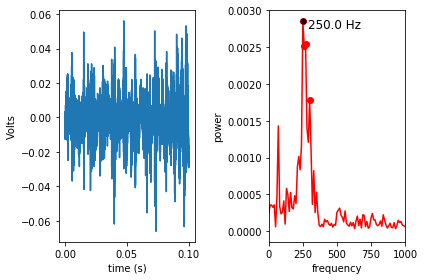

0.374902195259 Dev2/ai0


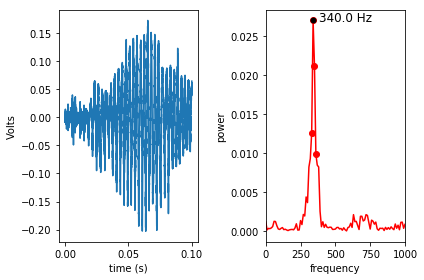

0.280285564109 Dev2/ai0


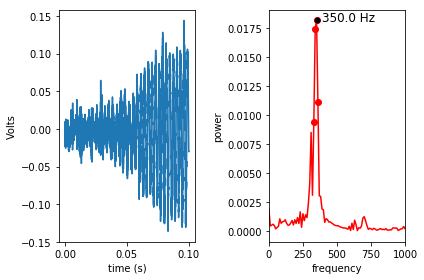

0.345739534789 Dev2/ai0


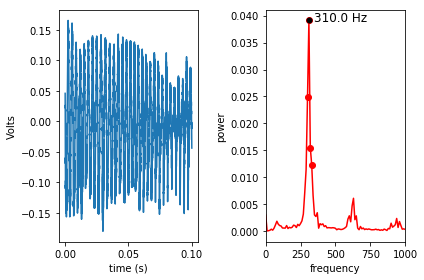

0.191177436551 Dev2/ai0


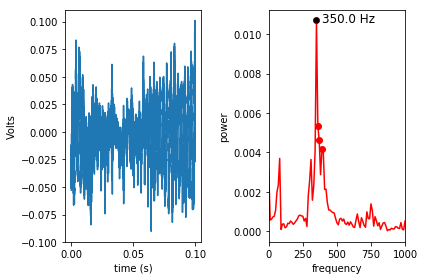

0.391751734189 Dev2/ai0


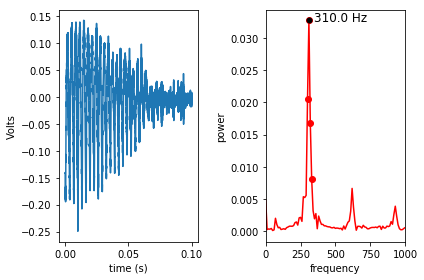

0.164282983693 Dev2/ai0


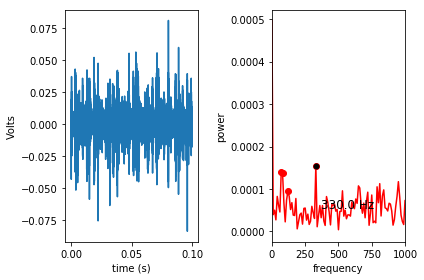

time out
now quitting loop
data saved to C:\Users\Combes4\Desktop\temp3\2018_07_25__14_10_18_676


In [24]:
# Recording program
# you fill in True/False here, for each trial
reward_1 = False
reward_2 = True


##____________________Don't change anything below_________________________##
# check rewards have been typed correctly
assert(reward1 == reward_1 and reward2 == reward_2), "Entered rewards do not match generated rewards"

# this function will time out after 5 min or 100 buzzes
# it will save data in the folder, "C:\\Users\\Combes4\\Desktop\\temp3\\"
trialFile = run_trial(reward_1, reward_2, acc1, acc2)

# Post processing
___
#### Change values in the next cell
___

In [526]:
# post-processing 
colonyNum = 5
IT_span = 4.67 # in mm
Notes = "" # leave as "", if there are no notes

#_____________________Don't change anything below____________________________#


# add colony number and ITspan and notes to csv file
fname = trialFile
csv_input = pd.read_csv(fname)
csv_input['colonyNum'] = colonyNum
csv_input['ITSpan_mm'] = IT_span
csv_input['Notes'] = Notes
csv_input.to_csv(fname, index=False)

# move videos from temp3 folder to trial folder
aviFiles = [f for f in os.listdir(os.path.dirname(os.path.dirname(trialFile))) if f.endswith(".avi")]

# move all avi files in TMP3 folder to sub folder
tmp = [shutil.move(os.path.join(os.path.dirname(os.path.dirname(trialFile)), aviFiles[ii]), 
             os.path.join(os.path.dirname(trialFile), aviFiles[ii])) for ii in range(len(aviFiles))]
print(str(len(tmp)) + " avi files moved")

csv_input.head()

14 avi files moved


,Amp_V,freq_Hz,accNum,rewardStatus,timestamp,treatment,colonyNum,ITSpan_mm,Notes
0,0.116327,330.0,Dev2/ai1,True,2018_07_25__14_10_21_326,Dev2/ai0_False__Dev2/ai1_True,5,4.67,
1,0.205111,370.0,Dev2/ai1,True,2018_07_25__14_10_22_304,Dev2/ai0_False__Dev2/ai1_True,5,4.67,
2,0.145489,330.0,Dev2/ai1,True,2018_07_25__14_10_23_303,Dev2/ai0_False__Dev2/ai1_True,5,4.67,
3,0.138361,310.0,Dev2/ai1,True,2018_07_25__14_10_24_478,Dev2/ai0_False__Dev2/ai1_True,5,4.67,
4,0.162339,360.0,Dev2/ai1,True,2018_07_25__14_10_25_282,Dev2/ai0_False__Dev2/ai1_True,5,4.67,


In [527]:
# copy the main data file to dropbox
dropboxDir = "D:\\Dropbox\\UW\\ExperWinter2018\\BeeTwoFlowerChoiceData\\"

#fileToCopy =  r"C:\Users\Combes4\Desktop\temp3\2018_07_25__12_56_13_838\2018_07_25__12_56_13_838.csv"
fileToCopy =  trialFile

#refref double check file to copy
shutil.copy(fileToCopy, dropboxDir)

'D:\\Dropbox\\UW\\ExperWinter2018\\BeeTwoFlowerChoiceData\\2018_07_25__14_10_18_676.csv'

In [ ]:
# may do this by hand
# move the other data to the big hard drive (takes a little while)
# backupDir = 'D:\\BeeTwoFlowerExperiment\\'

# directoryToMove = os.path.dirname(fileToCopy)
# stt = time.time()
# shutil.move(directoryToMove, backupDir)
# print(np.round((time.time() - stt) / 60, 2), "minutes")

--- END ---